<a href="https://colab.research.google.com/github/sathya-119/FastAi-Projects/blob/main/LuxeNot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [48]:
urls=search_images('Luxury cars',max_images=1)
urls[0]

'https://www.maskblogspot.com/wp-content/uploads/2020/05/McLaren-P1.jpg'

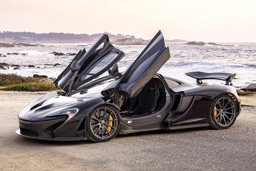

In [49]:
from fastdownload import download_url
dest='luxury cars.jpg'
download_url(urls[0],dest,show_progress=True)

from fastai.vision.all import *
im=Image.open(dest)
im.to_thumb(256,256)

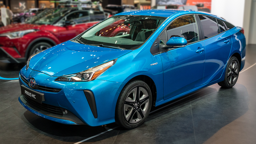

In [44]:
download_url(search_images('mid range car',max_images=1)[0],'mid range car.jpg',show_progress=True)
Image.open('mid range car.jpg').to_thumb(256,256)

In [45]:
searches='luxury cars','mid range car'
path=Path('lux_or_not')
for o in searches:
  dest=(path/o)
  dest.mkdir(exist_ok=True,parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  time.sleep(5)
  resize_images(path/o, max_size=400, dest=path/o)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [46]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

13

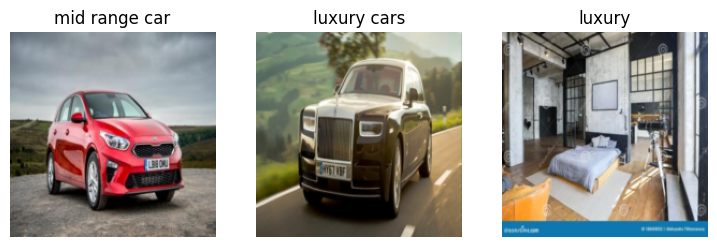

In [47]:
dls=DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,splitter=RandomSplitter(valid_pct=0.4,seed=42),get_y=parent_label,item_tfms=[Resize(192,method='squish')]).dataloaders(path,bs=32)
dls.show_batch(max_n=3)

In [50]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.416451,0.794900,0.224194,02:10


epoch,train_loss,valid_loss,error_rate,time
0,0.639008,0.621362,0.179032,03:04
1,0.417959,0.602632,0.167742,03:04
2,0.263986,0.643588,0.167742,03:07


This is a :luxury cars.
Probability is :0.0007


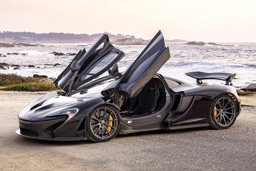

In [60]:
is_lux,_,probs=learn.predict(PILImage.create('luxury cars.jpg'))
print(f"This is a :{is_lux}.")
print(f"Probability is :{probs[0]:.4f}")
Image.open('luxury cars.jpg').to_thumb(256,256)

This is a :mid range car.
Probability is :0.0000


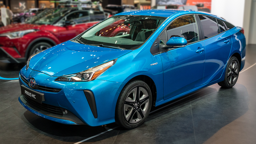

In [59]:
is_lux,_,probs=learn.predict(PILImage.create('mid range car.jpg'))
print(f"This is a :{is_lux}.")
print(f"Probability is :{probs[0]:.4f}")
Image.open('mid range car.jpg').to_thumb(256,256)

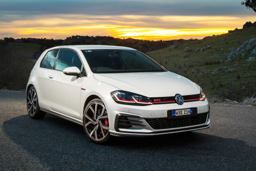

In [67]:
download_url(search_images('volkswagen car',max_images=1)[0],'vol.jpg',show_progress=True)
Image.open('vol.jpg').to_thumb(256,256)

This is a :luxury cars.
Probability is :0.0000


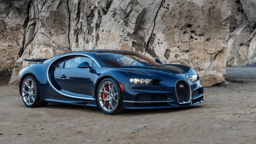

In [61]:
is_lux,_,probs=learn.predict(PILImage.create('car.jpg'))
print(f"This is a :{is_lux}.")
print(f"Probability is :{probs[0]:.4f}")
Image.open('car.jpg').to_thumb(256,256)

This is a :normal cars.
Probability is :0.0002


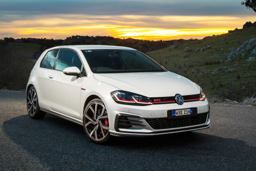

In [68]:
is_lux,_,probs=learn.predict(PILImage.create('vol.jpg'))
print(f"This is a :{is_lux}.")
print(f"Probability is :{probs[0]:.4f}")
Image.open('vol.jpg').to_thumb(256,256)